In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
import seaborn as sb
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
x_data = df.iloc[:,:-1].values
y_data = pd.get_dummies( df['species'] ).values

In [5]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

In [6]:
x= torch.FloatTensor( x_dataN)
y= torch.FloatTensor( y_data)

In [13]:
model = Sequential()
model.add_module('nn1', Linear(4,3)) # w:4x3 b:3
model.add_module( 'soft1', Softmax(dim=1) ) #활성함
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam( model.parameters(), lr=0.1)

In [14]:
hist=[]
for epoch in range(4000):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn( hx, y)
    cost.backward()
    optimizer.step()
    print( epoch, cost.item() )
    hist.append( cost.item() )

0 1.0740936994552612
1 1.0519968271255493
2 1.0328916311264038
3 1.0140455961227417
4 0.9945417046546936
5 0.9744333028793335
6 0.9542744755744934
7 0.9348275661468506
8 0.9168109893798828
9 0.9006807208061218
10 0.8865403532981873
11 0.8742071390151978
12 0.8633632659912109
13 0.8536831736564636
14 0.8448923230171204
15 0.8367713689804077
16 0.8291530609130859
17 0.8219384551048279
18 0.8151123523712158
19 0.808719277381897
20 0.8028014302253723
21 0.7973449230194092
22 0.7922756671905518
23 0.7875010967254639
24 0.7829596996307373
25 0.7786380052566528
26 0.7745469212532043
27 0.7706784009933472
28 0.7669867873191833
29 0.7634146213531494
30 0.7599347829818726
31 0.7565614581108093
32 0.7533182501792908
33 0.750205397605896
34 0.7471985816955566
35 0.744275689125061
36 0.7414370775222778
37 0.7386989593505859
38 0.7360715866088867
39 0.7335456013679504
40 0.7311030626296997
41 0.7287347912788391
42 0.7264453768730164
43 0.7242406010627747
44 0.7221155762672424
45 0.7200572490692139
4

378 0.5949876308441162
379 0.5949205756187439
380 0.5948538184165955
381 0.5947874188423157
382 0.594721257686615
383 0.5946555733680725
384 0.5945901274681091
385 0.5945250391960144
386 0.5944602489471436
387 0.5943957567214966
388 0.5943316221237183
389 0.594267725944519
390 0.5942042469978333
391 0.5941410660743713
392 0.5940781831741333
393 0.5940154790878296
394 0.5939532518386841
395 0.5938913226127625
396 0.5938295722007751
397 0.5937681794166565
398 0.5937071442604065
399 0.5936463475227356
400 0.5935857892036438
401 0.5935256481170654
402 0.5934656858444214
403 0.593406081199646
404 0.5933465957641602
405 0.5932875871658325
406 0.5932286977767944
407 0.5931702256202698
408 0.5931119322776794
409 0.5930539965629578
410 0.5929962396621704
411 0.5929388403892517
412 0.5928815603256226
413 0.5928248167037964
414 0.5927680730819702
415 0.5927117466926575
416 0.592655599117279
417 0.5925997495651245
418 0.5925440788269043
419 0.5924887657165527
420 0.5924336910247803
421 0.592378854

745 0.5821854472160339
746 0.582167387008667
747 0.5821493864059448
748 0.5821314454078674
749 0.58211350440979
750 0.5820955634117126
751 0.5820777416229248
752 0.5820600390434265
753 0.5820422172546387
754 0.5820245146751404
755 0.5820068120956421
756 0.5819892287254333
757 0.5819717049598694
758 0.5819541811943054
759 0.5819367170333862
760 0.5819193124771118
761 0.5819018483161926
762 0.581884503364563
763 0.5818672180175781
764 0.581849992275238
765 0.581832766532898
766 0.5818156003952026
767 0.5817984342575073
768 0.5817813873291016
769 0.5817643404006958
770 0.5817474126815796
771 0.5817303657531738
772 0.5817134976387024
773 0.581696629524231
774 0.5816797614097595
775 0.5816630125045776
776 0.5816462635993958
777 0.5816295146942139
778 0.5816128253936768
779 0.581596314907074
780 0.5815796852111816
781 0.5815631151199341
782 0.5815466642379761
783 0.5815302729606628
784 0.5815138816833496
785 0.5814974904060364
786 0.5814812183380127
787 0.5814648866653442
788 0.5814486145973

1164 0.5772630572319031
1165 0.5772554278373718
1166 0.5772477984428406
1167 0.5772401690483093
1168 0.5772325396537781
1169 0.577224850654602
1170 0.5772172808647156
1171 0.5772096514701843
1172 0.5772020816802979
1173 0.5771945118904114
1174 0.5771868824958801
1175 0.577179491519928
1176 0.5771718621253967
1177 0.5771642923355103
1178 0.5771568417549133
1179 0.5771493315696716
1180 0.5771418213844299
1181 0.5771343111991882
1182 0.5771268606185913
1183 0.5771194100379944
1184 0.5771119594573975
1185 0.5771045684814453
1186 0.5770971775054932
1187 0.5770897269248962
1188 0.5770823359489441
1189 0.5770750045776367
1190 0.5770675539970398
1191 0.5770601630210876
1192 0.5770528316497803
1193 0.5770455002784729
1194 0.5770382285118103
1195 0.5770308375358582
1196 0.5770235657691956
1197 0.5770162343978882
1198 0.5770090222358704
1199 0.5770017504692078
1200 0.5769945383071899
1201 0.5769872069358826
1202 0.5769799947738647
1203 0.5769727826118469
1204 0.5769655108451843
1205 0.57695829868

1537 0.5750517249107361
1538 0.5750471353530884
1539 0.5750425457954407
1540 0.5750378966331482
1541 0.5750333070755005
1542 0.575028657913208
1543 0.5750241875648499
1544 0.5750196576118469
1545 0.5750150680541992
1546 0.5750104188919067
1547 0.5750058889389038
1548 0.5750012993812561
1549 0.5749967694282532
1550 0.574992299079895
1551 0.5749877691268921
1552 0.5749832391738892
1553 0.5749786496162415
1554 0.5749741792678833
1555 0.5749697089195251
1556 0.5749651193618774
1557 0.5749606490135193
1558 0.5749561786651611
1559 0.5749516487121582
1560 0.5749471783638
1561 0.5749426484107971
1562 0.574938178062439
1563 0.5749337077140808
1564 0.5749291777610779
1565 0.5749247074127197
1566 0.5749202966690063
1567 0.574915885925293
1568 0.5749114155769348
1569 0.5749069452285767
1570 0.5749025940895081
1571 0.5748980641365051
1572 0.574893593788147
1573 0.5748892426490784
1574 0.574884831905365
1575 0.5748803615570068
1576 0.5748760104179382
1577 0.5748716592788696
1578 0.5748671293258667
1

2187 0.5728415250778198
2188 0.5728389620780945
2189 0.5728363990783691
2190 0.5728338360786438
2191 0.572831392288208
2192 0.5728287100791931
2193 0.5728262066841125
2194 0.5728235244750977
2195 0.5728210210800171
2196 0.5728185772895813
2197 0.572816014289856
2198 0.5728133916854858
2199 0.57281094789505
2200 0.5728083252906799
2201 0.5728057622909546
2202 0.572803258895874
2203 0.5728006958961487
2204 0.5727981328964233
2205 0.5727956891059875
2206 0.5727930665016174
2207 0.5727905035018921
2208 0.5727880001068115
2209 0.572785496711731
2210 0.5727828741073608
2211 0.572780430316925
2212 0.5727779269218445
2213 0.5727753043174744
2214 0.5727728605270386
2215 0.5727702975273132
2216 0.5727677941322327
2217 0.5727652907371521
2218 0.5727627277374268
2219 0.572760283946991
2220 0.5727577805519104
2221 0.5727552175521851
2222 0.5727527141571045
2223 0.5727502107620239
2224 0.5727476477622986
2225 0.5727452039718628
2226 0.5727426409721375
2227 0.5727401971817017
2228 0.5727376937866211


2559 0.5719862580299377
2560 0.5719841718673706
2561 0.5719820261001587
2562 0.5719799995422363
2563 0.5719779133796692
2564 0.571975827217102
2565 0.5719738006591797
2566 0.5719717144966125
2567 0.5719696283340454
2568 0.5719675421714783
2569 0.5719655156135559
2570 0.5719634294509888
2571 0.5719613432884216
2572 0.5719593167304993
2573 0.5719571709632874
2574 0.5719552040100098
2575 0.5719531178474426
2576 0.5719510912895203
2577 0.5719490647315979
2578 0.5719469785690308
2579 0.5719448328018188
2580 0.5719428062438965
2581 0.5719407796859741
2582 0.571938693523407
2583 0.5719366669654846
2584 0.5719345808029175
2585 0.5719325542449951
2586 0.5719305276870728
2587 0.5719283819198608
2588 0.5719264149665833
2589 0.5719243288040161
2590 0.5719223022460938
2591 0.5719203352928162
2592 0.5719181895256042
2593 0.5719162225723267
2594 0.5719141364097595
2595 0.5719120502471924
2596 0.5719099640846252
2597 0.5719079375267029
2598 0.5719059705734253
2599 0.5719039440155029
2600 0.57190191745

2976 0.5711907148361206
2977 0.5711889266967773
2978 0.5711871385574341
2979 0.5711853504180908
2980 0.5711836218833923
2981 0.5711818337440491
2982 0.5711800456047058
2983 0.5711783170700073
2984 0.5711765289306641
2985 0.5711748003959656
2986 0.5711730122566223
2987 0.571171224117279
2988 0.5711694955825806
2989 0.5711677074432373
2990 0.571165919303894
2991 0.5711641907691956
2992 0.5711624026298523
2993 0.5711606740951538
2994 0.5711589455604553
2995 0.5711570978164673
2996 0.5711553692817688
2997 0.5711536407470703
2998 0.571151852607727
2999 0.5711501240730286
3000 0.5711483955383301
3001 0.5711466073989868
3002 0.5711448192596436
3003 0.5711430907249451
3004 0.5711413025856018
3005 0.5711395740509033
3006 0.5711377859115601
3007 0.5711360573768616
3008 0.5711343288421631
3009 0.5711325407028198
3010 0.5711307525634766
3011 0.5711290836334229
3012 0.5711272954940796
3013 0.5711255669593811
3014 0.5711237788200378
3015 0.5711221098899841
3016 0.5711203217506409
3017 0.571118533611

3722 0.5699825286865234
3723 0.5699810981750488
3724 0.5699795484542847
3725 0.5699779987335205
3726 0.5699766278266907
3727 0.5699750781059265
3728 0.5699735283851624
3729 0.5699720978736877
3730 0.5699704885482788
3731 0.5699690580368042
3732 0.5699675679206848
3733 0.5699659585952759
3734 0.5699645280838013
3735 0.5699630975723267
3736 0.5699616074562073
3737 0.5699599981307983
3738 0.5699585676193237
3739 0.5699569582939148
3740 0.5699554681777954
3741 0.5699540376663208
3742 0.5699525475502014
3743 0.5699509978294373
3744 0.5699495077133179
3745 0.5699480175971985
3746 0.5699464678764343
3747 0.5699450373649597
3748 0.5699435472488403
3749 0.5699419975280762
3750 0.5699405074119568
3751 0.5699390172958374
3752 0.569937527179718
3753 0.5699360370635986
3754 0.5699344873428345
3755 0.5699329972267151
3756 0.5699315667152405
3757 0.5699300169944763
3758 0.5699284672737122
3759 0.5699270367622375
3760 0.5699254870414734
3761 0.569923996925354
3762 0.5699225068092346
3763 0.56992107629

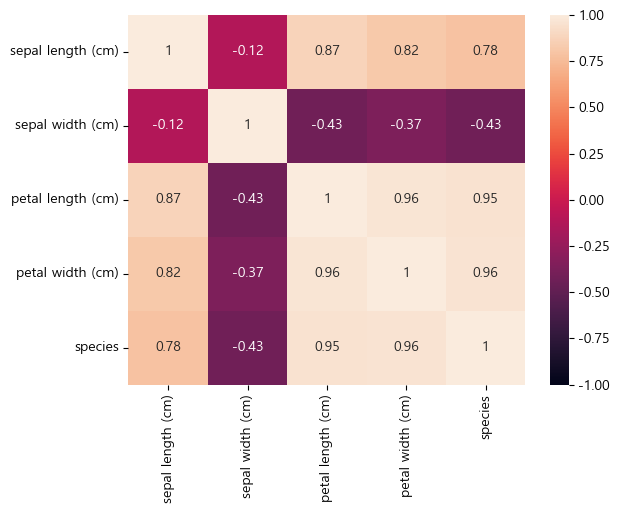

In [9]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

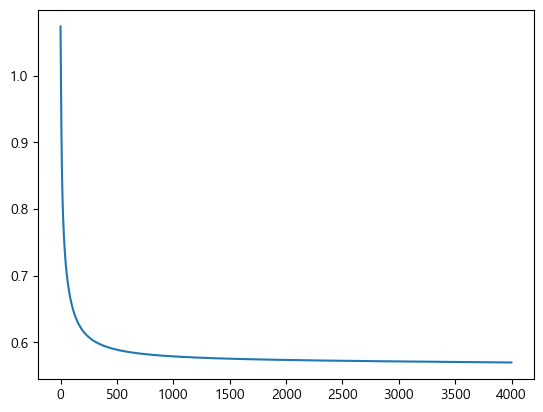

In [15]:
plt.plot( hist)
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score

In [20]:
r = y.argmax(dim=1).numpy()
r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [24]:
pred = model( x ).argmax(dim=1).detach().numpy()
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [26]:
c = confusion_matrix(r, pred)
c

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]], dtype=int64)

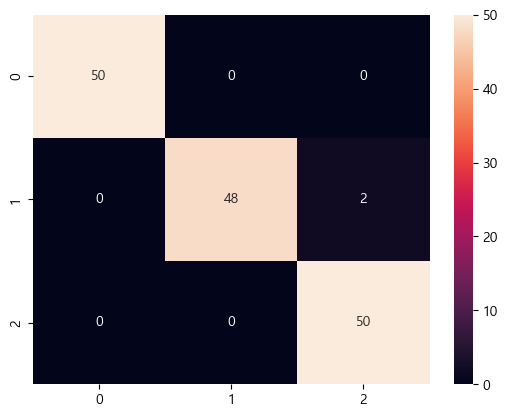

In [27]:
sb.heatmap(c, annot=True)
plt.show()

In [28]:
accuracy_score( r, pred)

0.9866666666666667

In [30]:
f1_score(r,pred,average='macro')

0.9866613311991462